<a href="https://colab.research.google.com/github/SarahHannes/tumor_classification/blob/main/torchmetric_plot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:
1. https://github.com/Lightning-AI/torchmetrics?tab=readme-ov-file
2. https://github.com/Lightning-AI/torchmetrics/blob/master/_samples/plotting.py

In [1]:
!pip install torchmetrics[audio]

In [2]:
!pip install pesq

In [3]:
!pip install torchmetrics

In [13]:
# Copyright The Lightning team.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import argparse

import matplotlib.pyplot as plt
import torch



def pesq_example() -> tuple:
    """Plot PESQ audio example."""
    from torchmetrics.audio.pesq import PerceptualEvaluationSpeechQuality

    p = lambda: torch.randn(8000)
    t = lambda: torch.randn(8000)

    # plot single value
    metric = PerceptualEvaluationSpeechQuality(8000, "nb")
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = PerceptualEvaluationSpeechQuality(16000, "wb")
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def pit_permutation_example() -> tuple:
    """Plot PIT audio example."""
    from torchmetrics.audio.pit import PermutationInvariantTraining
    from torchmetrics.functional import scale_invariant_signal_noise_ratio

    p = lambda: torch.randn(3, 2, 5)
    t = lambda: torch.randn(3, 2, 5)

    # plot single value
    metric = PermutationInvariantTraining(scale_invariant_signal_noise_ratio, "permutation-wise")
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = PermutationInvariantTraining(scale_invariant_signal_noise_ratio, "permutation-wise")
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax

def pit_speaker_example() -> tuple:
    """Plot PIT audio example."""
    from torchmetrics.audio.pit import PermutationInvariantTraining
    from torchmetrics.functional import scale_invariant_signal_noise_ratio

    p = lambda: torch.randn(3, 2, 5)
    t = lambda: torch.randn(3, 2, 5)

    # plot single value
    metric = PermutationInvariantTraining(scale_invariant_signal_noise_ratio, "speaker-wise")
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = PermutationInvariantTraining(scale_invariant_signal_noise_ratio, "speaker-wise")
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax

def sdr_example() -> tuple:
    """Plot SDR audio example."""
    from torchmetrics.audio.sdr import SignalDistortionRatio

    p = lambda: torch.randn(8000)
    t = lambda: torch.randn(8000)

    # plot single value
    metric = SignalDistortionRatio()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = SignalDistortionRatio()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def si_sdr_example() -> tuple:
    """Plot SI-SDR audio example."""
    from torchmetrics.audio.sdr import ScaleInvariantSignalDistortionRatio

    p = lambda: torch.randn(5)
    t = lambda: torch.randn(5)

    # plot single value
    metric = ScaleInvariantSignalDistortionRatio()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = ScaleInvariantSignalDistortionRatio()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def snr_example() -> tuple:
    """Plot SNR audio example."""
    from torchmetrics.audio.snr import SignalNoiseRatio

    p = lambda: torch.randn(4)
    t = lambda: torch.randn(4)

    # plot single value
    metric = SignalNoiseRatio()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = SignalNoiseRatio()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def si_snr_example() -> tuple:
    """Plot SI-SNR example."""
    from torchmetrics.audio.snr import ScaleInvariantSignalNoiseRatio

    p = lambda: torch.randn(4)
    t = lambda: torch.randn(4)

    # plot single value
    metric = ScaleInvariantSignalNoiseRatio()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = ScaleInvariantSignalNoiseRatio()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def stoi_example() -> tuple:
    """Plot STOI example."""
    from torchmetrics.audio.stoi import ShortTimeObjectiveIntelligibility

    p = lambda: torch.randn(8000)
    t = lambda: torch.randn(8000)

    # plot single value
    metric = ShortTimeObjectiveIntelligibility(8000, False)
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = ShortTimeObjectiveIntelligibility(8000, False)
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def accuracy_example() -> tuple:
    """Plot Accuracy example."""
    from torchmetrics.classification import MulticlassAccuracy

    p = lambda: torch.randn(20, 5)
    t = lambda: torch.randint(5, (20,))

    # plot single value
    metric = MulticlassAccuracy(num_classes=5)
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot a value per class
    metric = MulticlassAccuracy(num_classes=5, average=None)
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot two values as a series
    metric = MulticlassAccuracy(num_classes=5)
    val1 = metric(p(), t())
    val2 = metric(p(), t())
    fig, ax = metric.plot([val1, val2])

    # plot a series of values per class
    metric = MulticlassAccuracy(num_classes=5, average=None)
    val1 = metric(p(), t())
    val2 = metric(p(), t())
    fig, ax = metric.plot([val1, val2])
    return fig, ax


def mean_squared_error_example() -> tuple:
    """Plot mean squared error example."""
    from torchmetrics.regression import MeanSquaredError

    p = lambda: torch.randn(20)
    t = lambda: torch.randn(20)

    # single val
    metric = MeanSquaredError()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # multiple values
    metric = MeanSquaredError()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)
    return fig, ax


def confusion_matrix_example() -> tuple:
    """Plot confusion matrix example."""
    from torchmetrics.classification import MulticlassConfusionMatrix

    p = lambda: torch.randn(20, 5)
    t = lambda: torch.randint(5, (20,))

    # plot single value
    metric = MulticlassConfusionMatrix(num_classes=5)
    metric.update(p(), t())
    fig, ax = metric.plot()
    return fig, ax


def spectral_distortion_index_example() -> tuple:
    """Plot spectral distortion index example example."""
    from torchmetrics.image.d_lambda import SpectralDistortionIndex

    p = lambda: torch.rand([16, 3, 16, 16])
    t = lambda: torch.rand([16, 3, 16, 16])

    # plot single value
    metric = SpectralDistortionIndex()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = SpectralDistortionIndex()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def error_relative_global_dimensionless_synthesis() -> tuple:
    """Plot error relative global dimensionless synthesis example."""
    from torchmetrics.image.ergas import ErrorRelativeGlobalDimensionlessSynthesis

    gen = torch.manual_seed(42)
    p = lambda: torch.rand([16, 1, 16, 16], generator=gen)
    t = lambda: torch.rand([16, 1, 16, 16], generator=gen)

    # plot single value
    metric = ErrorRelativeGlobalDimensionlessSynthesis()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = ErrorRelativeGlobalDimensionlessSynthesis()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def peak_signal_noise_ratio() -> tuple:
    """Plot peak signal noise ratio example."""
    from torchmetrics.image.psnr import PeakSignalNoiseRatio

    p = lambda: torch.tensor([[0.0, 1.0], [2.0, 3.0]])
    t = lambda: torch.tensor([[3.0, 2.0], [1.0, 0.0]])

    # plot single value
    metric = PeakSignalNoiseRatio()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = PeakSignalNoiseRatio()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def spectral_angle_mapper() -> tuple:
    """Plot spectral angle mapper example."""
    from torchmetrics.image.sam import SpectralAngleMapper

    gen = torch.manual_seed(42)
    p = lambda: torch.rand([16, 3, 16, 16], generator=gen)
    t = lambda: torch.rand([16, 3, 16, 16], generator=gen)

    # plot single value
    metric = SpectralAngleMapper()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = SpectralAngleMapper()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def structural_similarity_index_measure() -> tuple:
    """Plot structural similarity index measure example."""
    from torchmetrics.image.ssim import StructuralSimilarityIndexMeasure

    gen = torch.manual_seed(42)
    p = lambda: torch.rand([3, 3, 256, 256], generator=gen)
    t = lambda: p() * 0.75

    # plot single value
    metric = StructuralSimilarityIndexMeasure()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = StructuralSimilarityIndexMeasure()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def multiscale_structural_similarity_index_measure() -> tuple:
    """Plot multiscale structural similarity index measure example."""
    from torchmetrics.image.ssim import MultiScaleStructuralSimilarityIndexMeasure

    gen = torch.manual_seed(42)
    p = lambda: torch.rand([3, 3, 256, 256], generator=gen)
    t = lambda: p() * 0.75

    # plot single value
    metric = MultiScaleStructuralSimilarityIndexMeasure()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = MultiScaleStructuralSimilarityIndexMeasure()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def universal_image_quality_index() -> tuple:
    """Plot universal image quality index example."""
    from torchmetrics.image.uqi import UniversalImageQualityIndex

    p = lambda: torch.rand([16, 1, 16, 16])
    t = lambda: p() * 0.75

    # plot single value
    metric = UniversalImageQualityIndex()
    metric.update(p(), t())
    fig, ax = metric.plot()

    # plot multiple values
    metric = UniversalImageQualityIndex()
    vals = [metric(p(), t()) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def mean_average_precision() -> tuple:
    """Plot MAP metric."""
    from torchmetrics.detection.mean_ap import MeanAveragePrecision

    preds = lambda: [
        {
            "boxes": torch.tensor([[258.0, 41.0, 606.0, 285.0]]) + torch.randint(10, (1, 4)),
            "scores": torch.tensor([0.536]) + 0.1 * torch.rand(1),
            "labels": torch.tensor([0]),
        }
    ]
    target = [
        {
            "boxes": torch.tensor([[214.0, 41.0, 562.0, 285.0]]),
            "labels": torch.tensor([0]),
        }
    ]

    # plot single value
    metric = MeanAveragePrecision()
    metric.update(preds(), target)
    fig, ax = metric.plot()

    # plot multiple values
    metric = MeanAveragePrecision()
    vals = [metric(preds(), target) for _ in range(10)]
    fig, ax = metric.plot(vals)

    return fig, ax


def roc_example() -> tuple:
    """Plot roc metric."""
    from torchmetrics.classification import BinaryROC, MulticlassROC, MultilabelROC

    p = lambda: torch.rand(20)
    t = lambda: torch.randint(2, (20,))

    metric = BinaryROC()
    metric.update(p(), t())
    fig, ax = metric.plot()

    p = lambda: torch.randn(200, 5)
    t = lambda: torch.randint(5, (200,))

    metric = MulticlassROC(5)
    metric.update(p(), t())
    fig, ax = metric.plot()

    p = lambda: torch.rand(20, 2)
    t = lambda: torch.randint(2, (20, 2))

    metric = MultilabelROC(2)
    metric.update(p(), t())

    return fig, ax


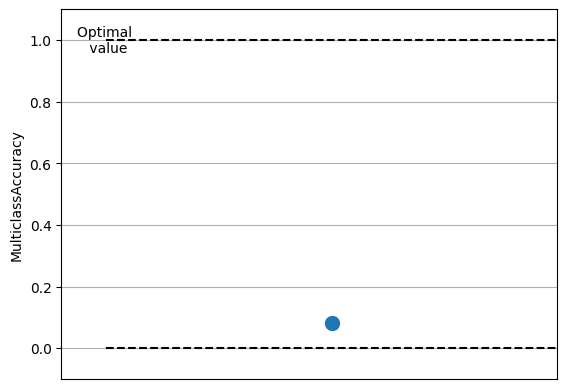

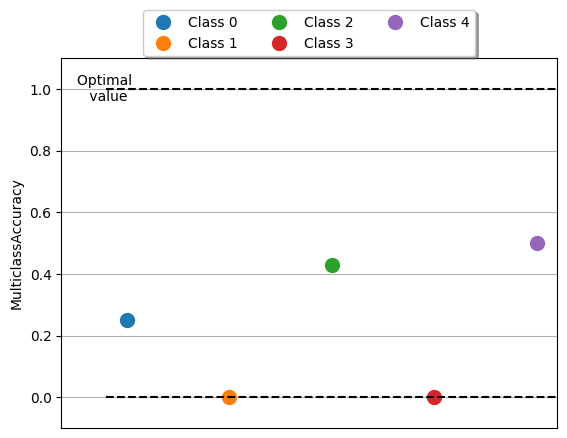

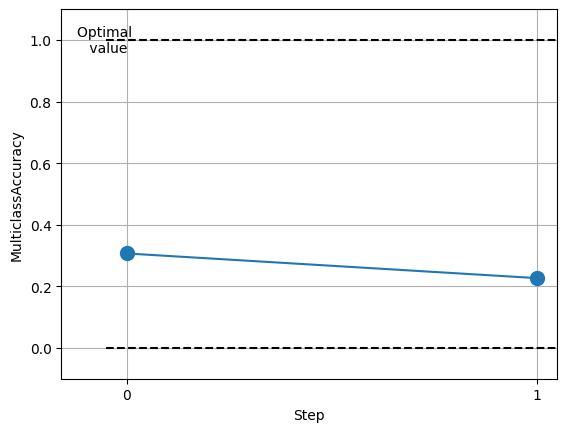

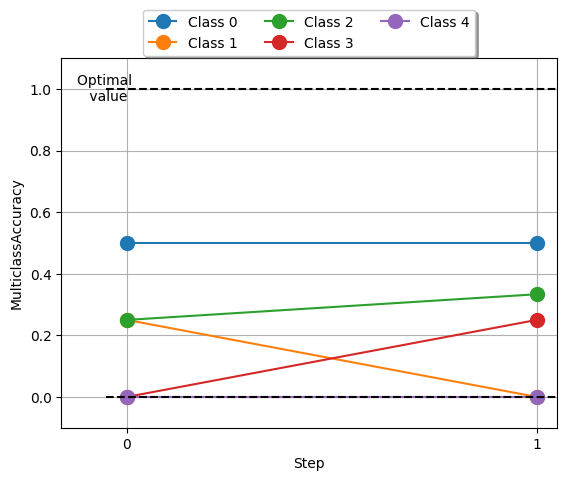

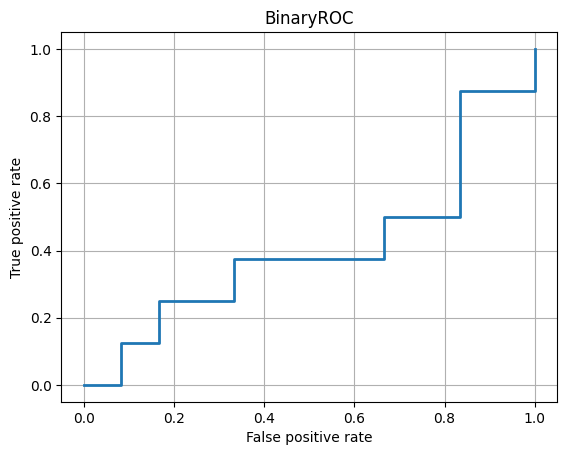

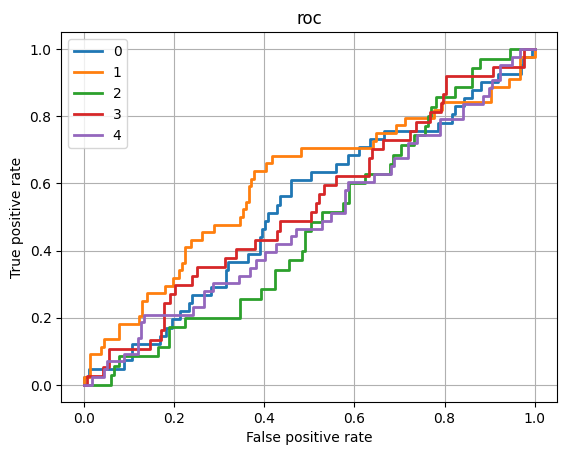

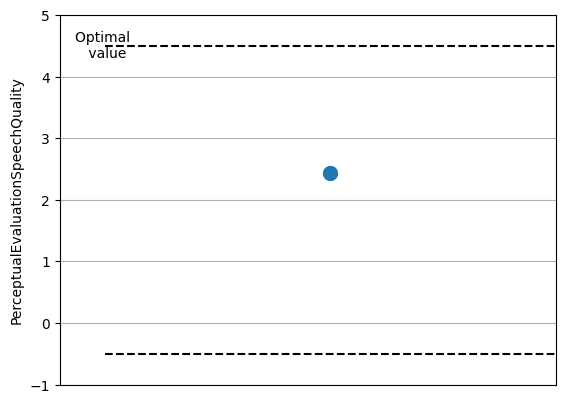

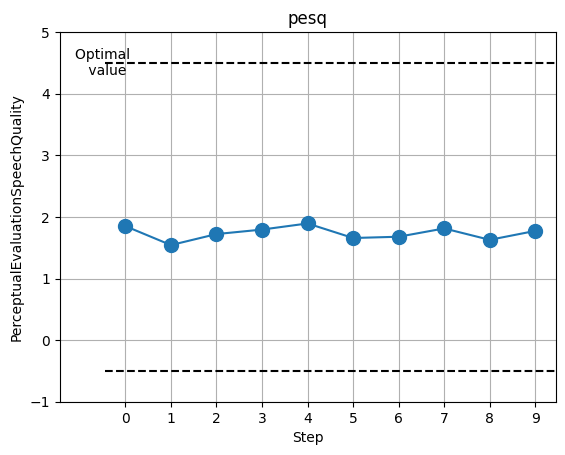

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `scale_invariant_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `scale_invariant_signal_noise_ratio` from `torchmetrics.audio` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `scale_invariant_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `scale_invariant_signal_noise_ratio` from `torchmetrics.audio` instead.
  _future_warning(


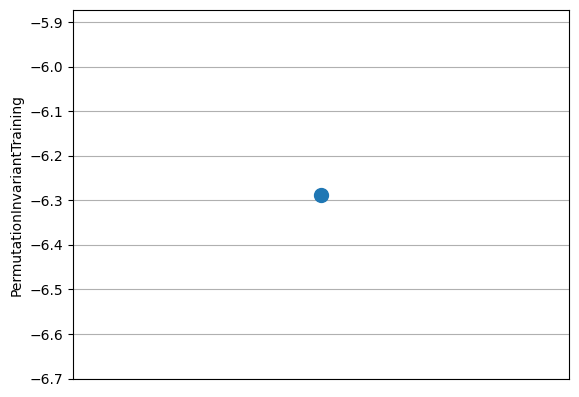

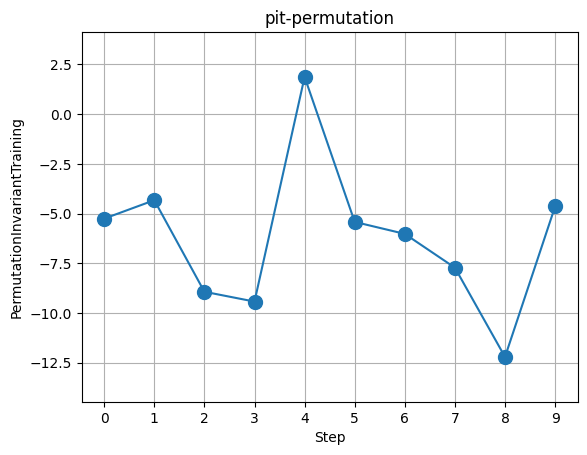

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `scale_invariant_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `scale_invariant_signal_noise_ratio` from `torchmetrics.audio` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `scale_invariant_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `scale_invariant_signal_noise_ratio` from `torchmetrics.audio` instead.
  _future_warning(


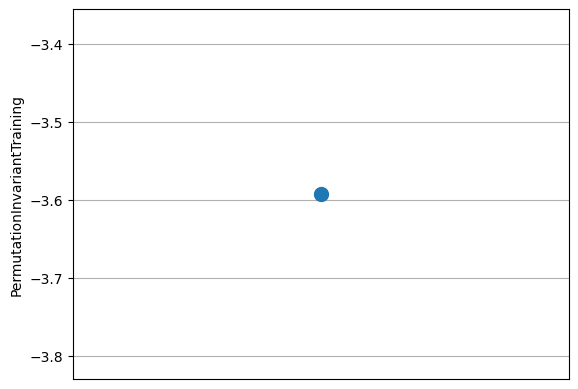

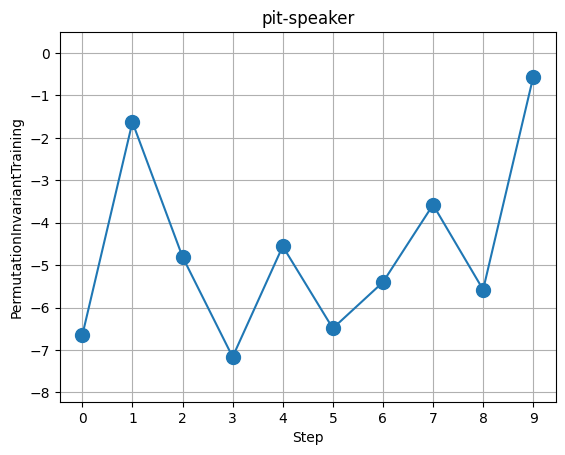

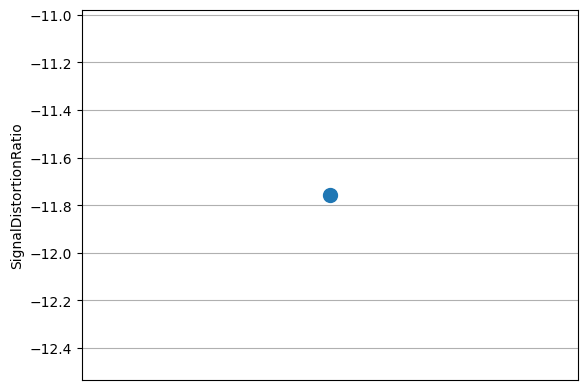

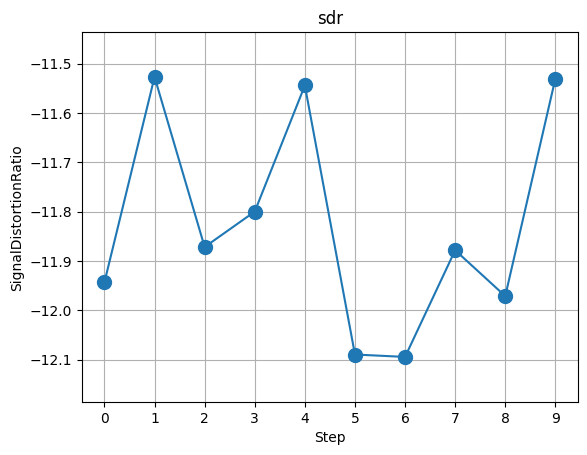

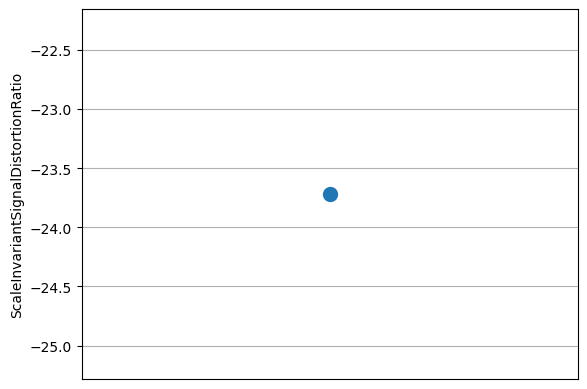

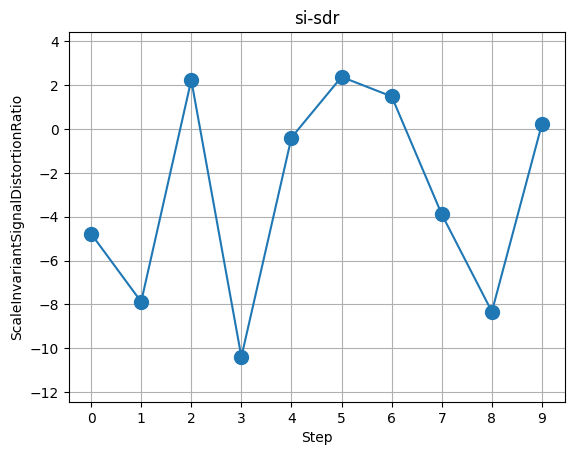

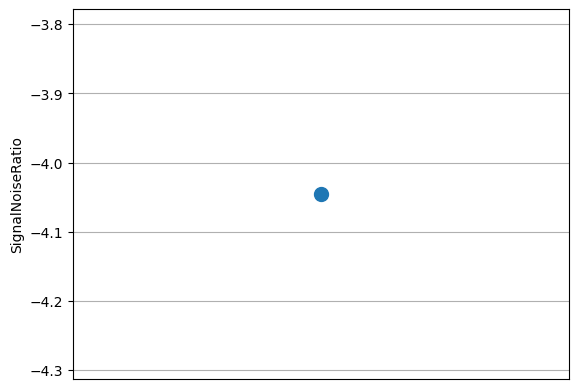

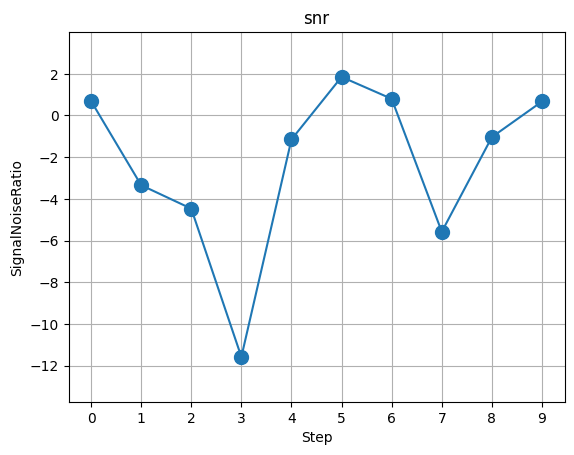

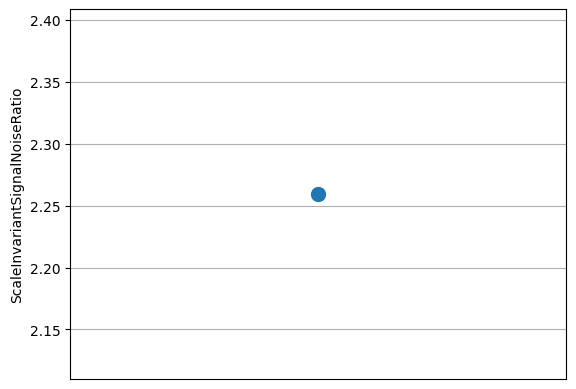

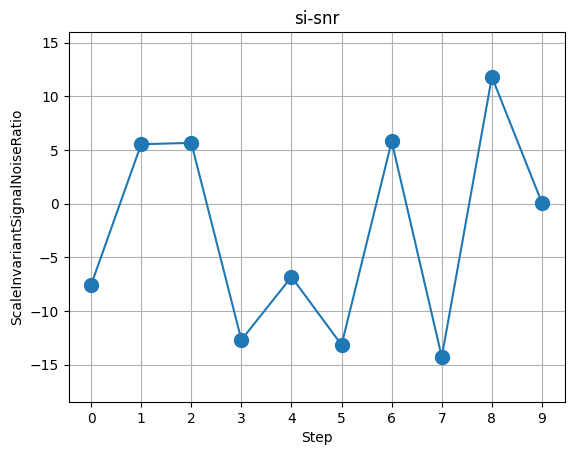

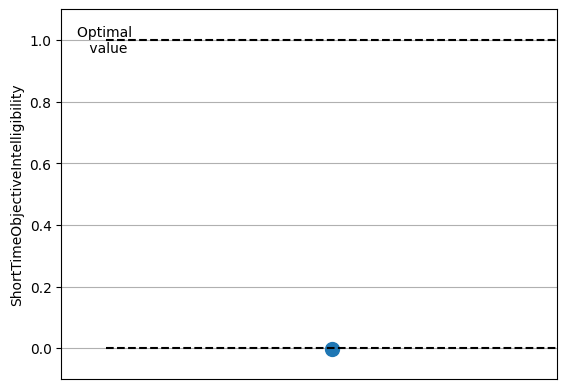

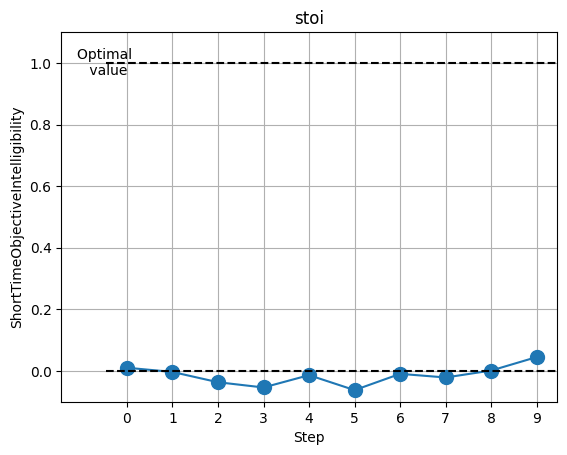

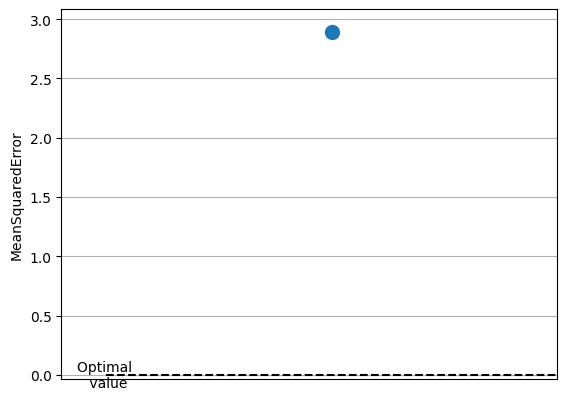

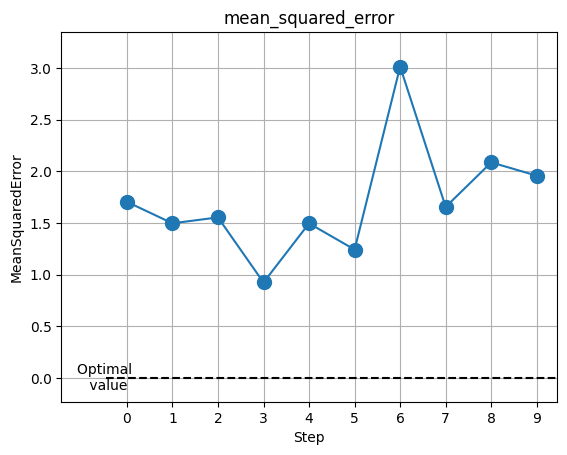

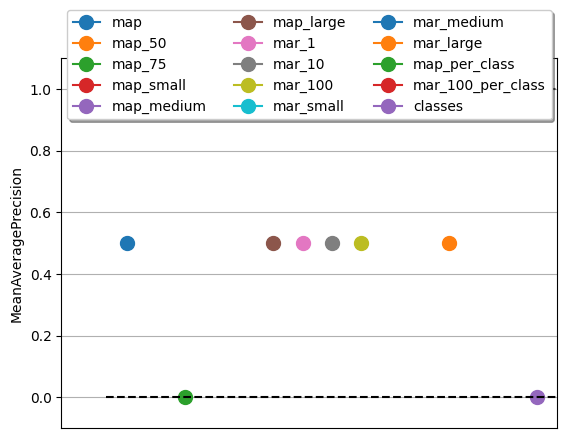

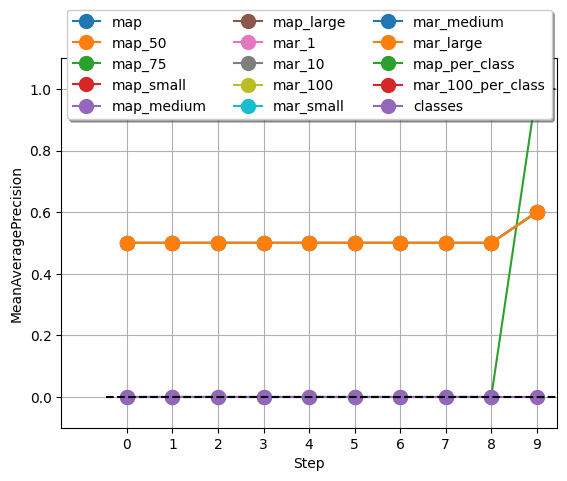

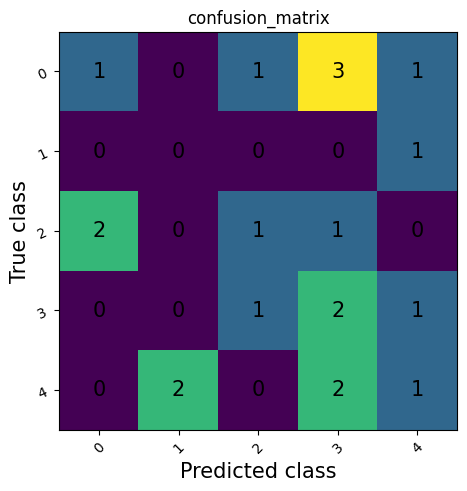

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpectralDistortionIndex` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpectralDistortionIndex` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [ ]:

metrics_func = {
    "accuracy": accuracy_example,
    "roc": roc_example,
    "pesq": pesq_example,
    "pit-permutation": pit_permutation_example,
    "pit-speaker": pit_speaker_example,
    "sdr": sdr_example,
    "si-sdr": si_sdr_example,
    "snr": snr_example,
    "si-snr": si_snr_example,
    "stoi": stoi_example,
    "mean_squared_error": mean_squared_error_example,
    "mean_average_precision": mean_average_precision,
    "confusion_matrix": confusion_matrix_example,
    "spectral_distortion_index": spectral_distortion_index_example,
    "error_relative_global_dimensionless_synthesis": error_relative_global_dimensionless_synthesis,
    "peak_signal_noise_ratio": peak_signal_noise_ratio,
    "spectral_angle_mapper": spectral_angle_mapper,
    "structural_similarity_index_measure": structural_similarity_index_measure,
    "multiscale_structural_similarity_index_measure": multiscale_structural_similarity_index_measure,
    "universal_image_quality_index": universal_image_quality_index,
}

for metric in metrics_func.keys():
  fig, ax = metrics_func[metric]()
  plt.title(metric)
  plt.show()